In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# List all files under the input directory (optional)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))


In [24]:

# Define paths for training and validation data
train_dir = '/kaggle/input/dogs-vs-cats/train'
validation_dir = '/kaggle/input/dogs-vs-cats/test'

# Create training dataset
train_data = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

# Create validation dataset
validation_data = keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

# Example of printing the structure of the datasets (optional)
for images, labels in train_data.take(1):
    print(images.shape, labels.shape)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
(32, 256, 256, 3) (32,)


In [25]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label
train_ds = train_data.map(process)
validation_ds = validation_data.map(process)

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid',activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())


model.add(Dense(128, activation='relu', kernel_regularizer = keras.regularizers.l2(.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(.001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,852,353 (56.66 MB)

 Trainable params: 14,851,905 (56.66 MB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
model.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [30]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.5166 - loss: 4.8066 - val_accuracy: 0.5292 - val_loss: 1.8842
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.5305 - loss: 1.7080 - val_accuracy: 0.5296 - val_loss: 1.1550
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5609 - loss: 1.1035 - val_accuracy: 0.6114 - val_loss: 1.2462
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.5931 - loss: 1.0074 - val_accuracy: 0.6500 - val_loss: 0.9571
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6370 - loss: 0.9717 - val_accuracy: 0.6002 - val_loss: 0.9531
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6808 - loss: 0.9392 - val_accuracy: 0.5176 - val_loss: 1.8518
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7099 - loss: 0.9490 - val_accuracy: 0.6970 - val_loss: 0.9789
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7522 - loss: 0.9248 - 

In [32]:
model.save("cat_dog_classifier.h5")

In [34]:
import pickle
pickle.dump(model, open("heart_disease_pred_model.pkl", "wb"))

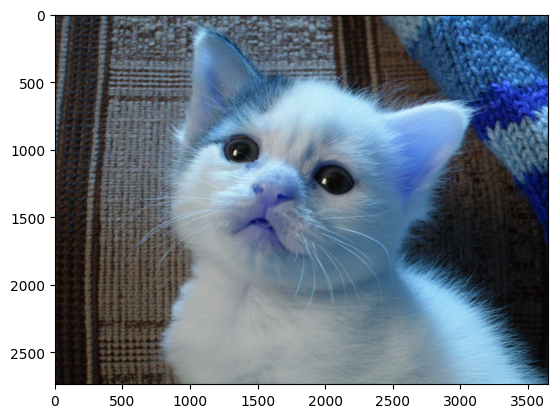

In [35]:
import cv2
test_image = cv2.imread("/kaggle/input/d/sikandarnust/cat-pik/cat.jpeg")
import matplotlib.pyplot as plt
plt.imshow(test_image)

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your test image
image_path = '/kaggle/input/dogs-vs-cats/test/some_test_image.jpg'

# Load the image
test_image = image.load_img(("/kaggle/input/d/sikandarnust/cat-pik/cat.jpeg"), target_size=(256, 256))

# Convert the image to array
img_array = image.img_to_array(test_image)

# Normalize the pixel values
img_array /= 255.0

# Expand dimensions to match the expected input shape for the model
img_array = np.expand_dims(img_array, axis=0)

# Check the shape of the array
print(img_array.shape)  # Should be (1, 256, 256, 3)


(1, 256, 256, 3)


In [42]:
model.predict(img_array)

2024-07-22 18:27:02.004095: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387127: 5.77154, expected 5.03187
2024-07-22 18:27:02.004155: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387168: 6.05753, expected 5.31786
2024-07-22 18:27:02.004165: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387274: 5.79451, expected 5.05483
2024-07-22 18:27:02.004173: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387303: 6.3865, expected 5.64683
2024-07-22 18:27:02.004181: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387310: 6.3852, expected 5.64553
2024-07-22 18:27:02.004189: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387370: 6.37416, expected 5.63449
2024-07-22 18:27:02.004202: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387381: 4.72788, expected 3.98821
2024-07-22 18:27:02.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


array([[6.8356605e-12]], dtype=float32)